## UCI ML Repository Character Font Images for MNIST Deep Learning Digit Recognition

[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) provides a variety of free datasets for practicing machine leanring. In this project, I will be using data from [Character Font Images](https://archive.ics.uci.edu/ml/datasets/Character+Font+Images) to perform digit recognition tasks.

The *Character Font Images* dataset contains 745000 images from 153 character fonts. The size of each image is 20x20 in grey scale (intensity 1 to 255, while 0 is white and 255 is black). Each data file is a CSV file with the following information:

| Field | Type | Unique | Example | Description |
|:-:|:----:|:------:|:-------:|:---:|
|font  | string | 153 | times | font family|
|fontVariant | string | 248 | times new roman | If the font image was from a scanner, the fontVariant is scanned. otherwise it is the font name. |
|m_label | integer | 11597 | 33 to 65535 | The character value, for instance 48 for the digit, 0 |
|strength | real | 2 |.4 | A value 0 to 1, indicating normal or bold |
|italic | integer | 2 | 1 | A flag, if 1, the image was computer generated with the an italic font. |
|m_top | integer | 13 |  | The topmost black pixel row index in the original image from which the image was cut |
|m_left | integer | 43 |  | The leftmost black pixel column index in the original image from which the image was cut| 
|originalH | integer | 30 |  | The original height of the image in pixels |
|originalW | integer| 36 |  | The original width of the image in pixels |
|h | integer | 1 | 20 | The image height in this sample, always 20 |
|w | integer | 1 | 20 | The image width in this sample, always 20 |
|r0c0 | integer | 255 | 0 | Row 0 Column 0 pixel value, 0 to 255, white is 0, 255 is black |
|r0c1 | integer | 255 | 0 | Row 0, Column 1 pixel value, 0 to 255 |
|r19c19 | integer | 255 |  | Row 19, Column 19 pixel value, 0 to 255|

### Task

The task is to use a variety of machine learning algorithms to build digit (0-9) recognition models using images from this dataset. As with most machine learning tasks, the todo list is as follows:

1. Importing and parsing the datasets
2. Descriptives and exploratory data analysis
3. Select a type of model
4. Train the model
5. Evaluate the model's effectiveness
6. Use the trained model to make predictions
7. Repeat steps 3-6 with increased model complexity

#### Step 1 and 2: Importing and cleaning the data, explore data

The dataset consists of 153 csv files, each with columns that are useful, and columns that are not. The first step is to load a few individual files and inspect them. Then, we need to extract rows that are images of digits.

In [1]:
import os
files = os.listdir('./data')
#print(files)
print(len(files)) # confirm that there are 153 csv files

153


In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
first_file = pd.read_csv('./data/' + files[0], index_col=False)
print(first_file.dtypes)
first_file.head(10)

font            object
fontVariant     object
m_label          int64
strength       float64
italic           int64
orientation    float64
m_top            int64
m_left           int64
originalH        int64
originalW        int64
h                int64
w                int64
r0c0             int64
r0c1             int64
r0c2             int64
r0c3             int64
r0c4             int64
r0c5             int64
r0c6             int64
r0c7             int64
r0c8             int64
r0c9             int64
r0c10            int64
r0c11            int64
r0c12            int64
r0c13            int64
r0c14            int64
r0c15            int64
r0c16            int64
r0c17            int64
                ...   
r18c10           int64
r18c11           int64
r18c12           int64
r18c13           int64
r18c14           int64
r18c15           int64
r18c16           int64
r18c17           int64
r18c18           int64
r18c19           int64
r19c0            int64
r19c1            int64
r19c2      

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,AGENCY,AGENCY FB,64258,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
1,AGENCY,AGENCY FB,64257,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
2,AGENCY,AGENCY FB,61442,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
3,AGENCY,AGENCY FB,61441,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
4,AGENCY,AGENCY FB,9674,0.4,0,0.0,51,21,33,25,...,255,132,1,1,1,1,1,1,1,1
5,AGENCY,AGENCY FB,8805,0.4,0,0.0,51,23,30,17,...,255,255,255,255,255,255,255,255,255,255
6,AGENCY,AGENCY FB,8804,0.4,0,0.0,51,22,30,17,...,255,255,255,255,255,255,255,255,255,255
7,AGENCY,AGENCY FB,8800,0.4,0,0.0,47,23,37,23,...,1,1,1,1,1,1,1,1,1,1
8,AGENCY,AGENCY FB,8776,0.4,0,0.0,53,26,22,23,...,1,1,20,24,74,255,255,255,255,54
9,AGENCY,AGENCY FB,8747,0.4,0,0.0,35,19,64,16,...,176,116,48,0,0,0,0,0,0,0


In [4]:
first_file.isna().sum().sum() # checking that no cell is missing

0

There is some information that we definitely do not need here. The first two columns contain information about fonts, which is not necessary here. Whether the character is bold or italic might be useful in some models, which I will keep. `m_label` is the label here which I will keep. Next step will be extracting only images that are numbers. If each `m_label` value is unique, we will be able to use it as the row index, and extracting those images would be much easy. Unfortunately, the following validation indicates that it's not. We will need to use a numeric range for choosing all digits.

In [5]:
print(first_file.shape[0])
print(len(first_file.m_label.unique()))

1004
251


In [6]:
first_file_digits = first_file[first_file.m_label.apply(lambda x: x >= ord('0') and x <= ord('9'))]
first_file_digits.shape

(40, 412)

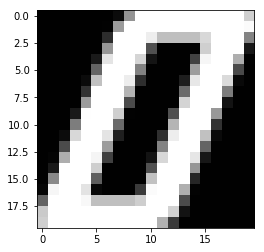

In [7]:
# Show one of the images:

def show_image(df, row):
    from PIL import Image
    array = np.asarray(df.iloc[row, -400:]).astype(np.uint8)
    img = Image.frombytes('L', (20, 20), array)
    plt.imshow(img)
    
show_image(first_file_digits, 39)

Now we can start to batch import data from all CSV files.

In [8]:
df_list = []

for file in files:
    df = pd.read_csv('./data/' + file, index_col=False)
    df = df[df.m_label.apply(lambda x: x >= ord('0') and x <= ord('9'))]
    df.drop(columns = first_file.columns[[0, 1, 5, 6, 7, 8, 9, 10, 11]], inplace=True)
    print(file, df.shape)
    df_list.append(df)
    
df_digits = pd.concat(df_list)

AGENCY.csv (40, 403)
ARIAL.csv (7844, 403)
BAITI.csv (40, 403)
BANKGOTHIC.csv (80, 403)
BASKERVILLE.csv (40, 403)
BAUHAUS.csv (40, 403)
BELL.csv (40, 403)
BERLIN.csv (80, 403)
BERNARD.csv (40, 403)
BITSTREAMVERA.csv (596, 403)
BLACKADDER.csv (40, 403)
BODONI.csv (160, 403)
BOOK.csv (40, 403)
BOOKMAN.csv (40, 403)
BRADLEY.csv (40, 403)
BRITANNIC.csv (40, 403)
BROADWAY.csv (40, 403)
BRUSH.csv (40, 403)
BUXTON.csv (40, 403)
CAARD.csv (80, 403)
CALIBRI.csv (80, 403)
CALIFORNIAN.csv (40, 403)
CALISTO.csv (40, 403)
CAMBRIA.csv (40, 403)
CANDARA.csv (40, 403)
CASTELLAR.csv (40, 403)
CENTAUR.csv (40, 403)
CENTURY.csv (120, 403)
CHILLER.csv (40, 403)
CITYBLUEPRINT.csv (40, 403)
COMIC.csv (40, 403)
COMMERCIALSCRIPT.csv (40, 403)
COMPLEX.csv (40, 403)
CONSOLAS.csv (40, 403)
CONSTANTIA.csv (40, 403)
COOPER.csv (40, 403)
COPPERPLATE.csv (80, 403)
CORBEL.csv (40, 403)
COUNTRYBLUEPRINT.csv (40, 403)
COURIER.csv (573, 403)
CREDITCARD.csv (29449, 403)
CURLZ.csv (40, 403)
DUTCH801.csv (80, 403)
E13B.csv

In [9]:
df_digits.shape

(217639, 403)

We still have two more problems: 1) `m_label` needs to be converted back to 0 to 9, and 2) the column `strength` is pretty confusing. We will need to change its name to `"bold"` and give it binary values.

In [10]:
df_digits.m_label = df_digits.m_label - 48
bold = df_digits.strength == 0.7
df_digits.drop(columns = ["strength"], inplace=True)
df_digits.insert(1, "bold", bold.astype("int64"))

In [11]:
df_digits.groupby("m_label").size()

m_label
0    28034
1    28879
2    22170
3    20431
4    21233
5    18444
6    22360
7    18091
8    20669
9    17328
dtype: int64

The resulting dataset has 217639 images and 10 labels, and with the exception of 0s and 1s, these labels have similar numbers of examples. Since this dataset is big enough, I will use 70% of this dataset for training, 15% for validation, 15% for testing. **n-fold validation** is computationally intensive and really not necessary for this dataset.

#### Step 3: Select training models

Since this is a classification task, I will use 3 different types of classification models. 
1. A "vanilla" model (multinomial regression)
2. An ensemble model (eXtreme Gradient Boosting, XGBoost)
3. A deep learning model (LeNet5 Convolutional Neural Network).

The first two will require a bit of feature engineering, mainly to reduce the dimension of the data. I will

1. Check if any column has low variance. If yes, remove them.
2. Perform principal component analysis (PCA) to reduce dimensionality
3. Split the dataset (70, 15, 15)

In [12]:
df_copy = df_digits.copy()

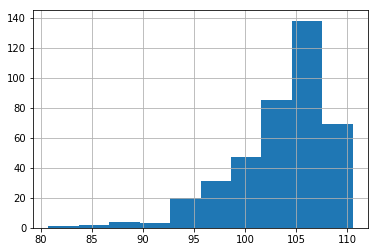

In [13]:
stds = df_copy.apply(pd.Series.std, axis = 0)[3:]
stds.hist()

In [14]:
from sklearn.decomposition import PCA

imgs = df_copy.iloc[:, 3:]
pca = PCA(0.88)
transformed = pca.fit_transform(imgs)
transformed.shape

(217639, 44)

Principal component analysis retained 88% of the total variance with 44 components. Now I will build a multinomial regression model.

In [15]:
df_pca = np.concatenate((np.asarray(df_copy.iloc[:, 0:3]), transformed), axis = 1)
df_pca.shape

(217639, 47)

In [16]:
from sklearn.model_selection import train_test_split
import random

random.seed(12345)

X_train, X_test, y_train, y_test = train_test_split(df_pca[:, 1:], df_pca[:, 0], test_size=0.15, train_size=0.85, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15*0.85, train_size=0.85*0.85, shuffle=True)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(133657, 46)
(23587, 46)
(32646, 46)


In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class="multinomial", max_iter=100, solver = "lbfgs")
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_val, y_val))
y_pred = lr.predict(X_val)

0.8476922271186694
0.8472887607580447


In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[2587,   74,   39,   13,  110,    4,   64,   18,   75,   19],
       [  29, 2805,  109,   25,   59,   23,   55,   29,   61,   35],
       [  50,  119, 1870,   19,   72,   15,   73,   26,   51,    9],
       [  57,   57,   30, 1947,   32,   41,   19,   10,   39,   13],
       [  52,   76,   68,   19, 1865,   12,   81,    8,   66,   85],
       [  10,   49,   25,   22,   12, 1714,   72,    7,   25,    6],
       [  64,   92,   48,   15,   65,   12, 2104,    1,   30,   14],
       [   2,   29,   10,    2,    8,    5,    4, 1872,    5,   33],
       [ 129,  106,  111,   43,   68,   31,   63,   30, 1660,   58],
       [  22,   34,    6,   19,   76,   19,    8,   19,   53, 1561]],
      dtype=int64)

So multinomial regression reached an accuracy of 85%, which is not very good by today's standards.  Althought it is still possible to fine tune this model to achieve better results, it might simply not improve much due to the limitation of the model itself. Next, I will use boosting methods to learn a more sophisitated model and see how much an ensemble model can improve the results of prediction.

In [31]:
from xgboost import XGBClassifier

boost_model = XGBClassifier(learning_rate=0.1, n_estimators=100, objective="multi:softprob", booster="gbtree", n_jobs=4)

boost_model.fit(X_train, y_train)
print(boost_model.score(X_train, y_train))
print(boost_model.score(X_val, y_val))

c:\users\paul\anaconda3\envs\tfgpu\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8924785084208084
0.8867596557425701


c:\users\paul\anaconda3\envs\tfgpu\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


So both training and test accuracy scores improved, but not by much. I will use grid search cross validation to select the best parameters.

In [35]:
from sklearn.model_selection import GridSearchCV

# It is possible to use a larger search space, but for now I will use this smaller search space to save time.

params_dict = {
    "max_depth": [3,5],
    "n_estimators": [100, 150],
    "booster": ["gbtree", "dart"],
    "subsample": [0.6, 0.8, 1],
    "reg_lambda": [0, 0.01, 0.1]
}

boost_model_cv = XGBClassifier()

# Because GridSearch uses n-fold CV automatically, I create X_dev and y_dev with both training and validation sets

X_dev = np.concatenate((X_train, X_val), axis = 0)
y_dev = np.concatenate((y_train, y_val), axis = 0)

cv = GridSearchCV(boost_model_cv, params_dict, scoring="accuracy", n_jobs=4, cv=2)
cv.fit(X_dev, y_dev)

GridSearchCV(cv=2, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': [3, 5], 'n_estimators': [100, 150], 'booster': ['gbtree', 'dart'], 'subsample': [0.6, 0.8, 1], 'reg_lambda': [0, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
print(cv.best_params_)
print(cv.best_score_)

{'booster': 'dart', 'max_depth': 5, 'n_estimators': 150, 'reg_lambda': 0.01, 'subsample': 0.6}
0.956608837221134


So after grid search, accuracy improved to 95.6%, which is a pretty big margin. It seems that increasing number of estimators, max depths, decreasing regularization parameters, and choosing a smaller subsample size actually improved the model. It's still possible to fine tune the hyperparameters to achieve slightly better results, but this is pushing the boundary of what boosting models can do. Next, let's try a Convolutional Neural Network (CNN) with TensorFlow's high level estimator APIs. The neural network is constructed with a similar structure to LeNet-5 featured in [this tutorial](https://www.tensorflow.org/tutorials/layers).

With CNN we only need the images and the labels. So I will perform a train-test split again.

In [82]:
import tensorflow as tf

In [86]:
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_copy.values[:, 3:])

#encoder = LabelBinarizer()
#encoded = encoder.fit_transform(df_copy.values[:, 0])

X_train, X_test, y_train, y_test = train_test_split(scaled, df_copy.values[:,0], test_size=0.15, train_size=0.85, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15*0.85, train_size=0.85*0.85, shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(X_test.shape)

c:\users\paul\anaconda3\envs\tfgpu\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(133657, 400)
(133657,)
(23587, 400)
(32646, 400)


In [107]:
# Define a model function

def cnn_model_fn(features, labels, mode):
    with tf.device('/gpu:0'):
        input_layer = tf.reshape(features["x"], [-1, 20, 20, 1]) # images are 20x20

        conv1 = tf.layers.conv2d(
            inputs = input_layer,
            filters = 32,
            kernel_size = [3, 3],
            padding = "same",
            activation = tf.nn.relu
        )

        pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

        conv2 = tf.layers.conv2d(
            inputs = pool1,
            filters = 64,
            kernel_size = [3, 3],
            padding = "same",
            activation = tf.nn.relu
        )

        pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

        pool2_flat = tf.reshape(pool2, [-1, 5*5*64])

        dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

        dropout = tf.layers.dropout(inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

        logits = tf.layers.dense(inputs=dropout, units=10)

        predictions = {
            "classes": tf.argmax(input=logits, axis=1),
            "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
        }

        if mode == tf.estimator.ModeKeys.PREDICT:
            return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

        loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

        if mode == tf.estimator.ModeKeys.TRAIN:
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
            train_op = optimizer.minimize(
                loss=loss, global_step=tf.train.get_global_step())
            return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

        eval_metric_ops = {
            "accuracy": tf.metrics.accuracy(labels=labels, predictions=predictions["classes"])}

        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [114]:
# Create the estimator

mnist_classifier = tf.estimator.Estimator(
    model_fn = cnn_model_fn, model_dir = ".")

# Setup logging for predictions

tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)

# Train the model

train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {"x": X_train},
    y = y_train,
    batch_size = 100,
    num_epochs = 2,
    shuffle = True
)
mnist_classifier.train(
    input_fn=train_input_fn,
    steps=20000
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '.', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028027A0ABA8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from .\model.ckpt-32697
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 32698 into .\m

In [115]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": X_val},
    y=y_val,
    num_epochs=1,
    shuffle=False)
eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-01-02:56:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from .\model.ckpt-35371
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-01-02:56:41
INFO:tensorflow:Saving dict for global step 35371: accuracy = 0.95128673, global_step = 35371, loss = 0.17471893
{'accuracy': 0.95128673, 'loss': 0.17471893, 'global_step': 35371}


In [116]:
test_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(test_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-01-02:56:44
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from .\model.ckpt-35371
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-01-02:56:46
INFO:tensorflow:Saving dict for global step 35371: accuracy = 0.95128673, global_step = 35371, loss = 0.17471893
{'accuracy': 0.95128673, 'loss': 0.17471893, 'global_step': 35371}


So with CNN the accuracy is also around 95%. The model's performance improves as more training steps are performed. The use of GPU also significantly sped up the training process.  With XGBClassifier and GridSearchCV, it ended up taking more than 5 hours to search for the best model in a rather small search space, while with TensorFlow on a GTX1060 6GB each 20000 steps took about 5 minutes.